In [98]:
# Importing thhe necessay libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [99]:
# Loading the dataset
# dropping the column

df_avacado = pd.read_csv("avacado.csv")
df_avacado.drop(labels=['Unnamed: 0'], axis = 1, inplace = True)
df_avacado['Date'] = df_avacado['Date'].apply(pd.to_datetime)
df_avacado['ts'] = df_avacado.Date.values.astype(np.int64) // 10 ** 9
df_avacado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,ts
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,1451174400
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,1450569600
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,1449964800
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,1434067200
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,1448755200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,1476576000
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,1473465600
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,1455062400
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,1474761600


In [100]:
# Checking the shape of the dataset

df_avacado.shape

(1517, 14)

In [101]:
# Let's check the data type of each variable.

df_avacado.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
ts                       int64
dtype: object

The dataset contains 9 columns having 'float64', 2 column as 'int64' and 3 columns having 'object' data type.

In [102]:
# Let's use the describe function to check the statistical summary of the dataset.

df_avacado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,ts
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1.517000e+03
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,1.440468e+09
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,1.475443e+07
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.420157e+09
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,1.429402e+09
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,1.438474e+09
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,1.448755e+09
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,1.482624e+09


In [103]:
# Let's check the null values.

df_avacado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
ts              0
dtype: int64

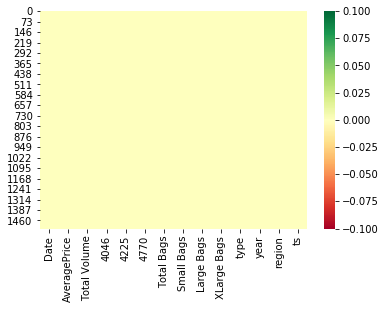

In [104]:
# Visualizationn of null values using heatmap.

sns.heatmap(df_avacado.isnull(), cmap = "RdYlGn")

Thus, from above , it is clear that there are no null values present in the dataset.

In [105]:
# Let's see the correlation.

df_avacado.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,ts
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.183959
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.039438
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.066619
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.044310
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.012267
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.040542
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.052889
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.041524
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.186979
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,0.784683


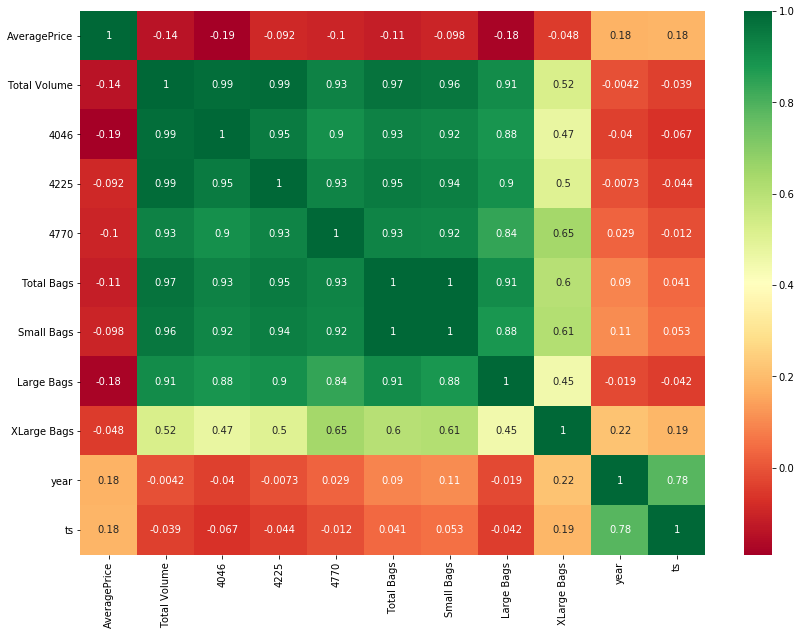

In [106]:
# Visualizing the correlation amaong the variables.

plt.figure(figsize=(14,10))
sns.heatmap(df_avacado.corr(), cmap= "RdYlGn", annot= True)

In [107]:
df_avacado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'ts'],
      dtype='object')

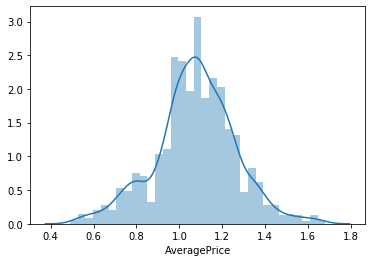

In [108]:
# Let's  check the value counts of the target variable.

sns.distplot(df_avacado.AveragePrice)

In [109]:
# Plotting the outliers.
collist = df_avacado.columns.values
ncol = 14
nrows = 30

TypeError: unsupported operand type(s) for /: 'str' and 'int'

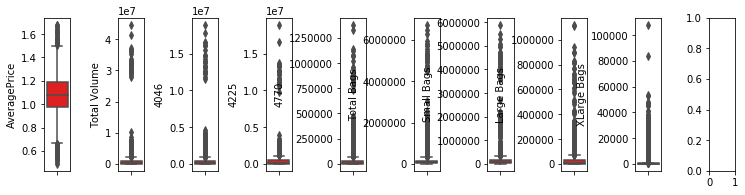

In [110]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df_avacado[collist[i]],color = 'red', orient = 'v')
    plt.tight_layout()

In [ ]:
df_avacado['region'].value_counts()

In [ ]:
df_avacado['type'].value_counts()

In [ ]:
# Dropping the "Date" because it is not contributing in the dataset.
# dropping "type" also because in whole dataset there is only one type - conventional.

df_avacado = df_avacado.drop(['Date'], axis=1)
df_avacado = df_avacado.drop(['type'], axis=1)

In [ ]:
# scaling the 'region' thus converting it into numerical data via labelencoding.

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_avacado['region'] = labelencoder.fit_transform(df_avacado['region'])
df_avacado.head()

In [ ]:
# Again checking teh value count of 'region'

df_avacado['region'].value_counts()

In [ ]:
df_avacado['year'].value_counts()

In [ ]:
df_avacado['year'] = df_avacado.year.replace({2015:0, 2016:1})
df_avacado.year.value_counts()

In [ ]:
df_avacado.head()

In [ ]:
# Visualizing the correlation amaong the variables.

plt.figure(figsize=(14,10))
sns.heatmap(df_avacado.corr(), cmap= "RdYlGn", annot= True)

In [ ]:
# df_avacado = df_avacado.drop(['year'], axis=1)

# It is very negatively correlated with teh target variable hence dropping it.

In [ ]:
# Lets check the skewness of dataset.
df_avacado.skew()

In [ ]:
for col in df_avacado.columns:
    if df_avacado.skew().loc[col]>0.55:
        df_avacado[col]=np.sqrt(df_avacado[col])

In [ ]:
df_avacado.skew()

In [ ]:
df_avacado

In [ ]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore
z = np.abs(zscore(df_avacado))
print(z.shape)
df_avacado = df_avacado.loc[(z<3).all(axis=1)]
print(df_avacado.shape)

In [ ]:
df_avacado.hist()

In [ ]:
standardScaler = StandardScaler()
col = ['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'ts']
df_avacado[col] = standardScaler.fit_transform(df_avacado[col])

In [ ]:
df_avacado_reg = pd.get_dummies(df_avacado, columns = ['region', 'year'])
df_avacado_class = pd.get_dummies(df_avacado, columns = ['year'])

In [ ]:
df_avacado_reg

In [ ]:
df_avacado_class

By comparing shape of 'z' and 'df_heart' shape , 43 rows have been removed as outliers.

The data cleaning is done.

In [ ]:
# Separating the input and target variables

X_reg = df_avacado_reg.drop(columns=["AveragePrice"])
y_reg = df_avacado_reg[["AveragePrice"]]

X_class = df_avacado.drop(columns=["region"])
y_class = df_avacado[["region"]]

In [ ]:
# Splitting the training and testing data and finding the maximum r2 score at random state.
def max_r2_score (reg, X, y):
    max_r_scr = 0
    final_r_state = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
    print("Maximum r2 score corresponding to", final_r_state, "is :", max_r_scr)

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

lr = LinearRegression()
r_state = max_r2_score(lr, X_reg, y_reg)

In [ ]:
# Cross validation with linear regression

print("Mean r2 score :", cross_val_score(lr, X_reg, y_reg, cv=5, scoring = "r2").mean())
print("Standard Deviationin r2 score :", cross_val_score(lr, X_reg, y_reg, cv=5, scoring = "r2").std())

In [ ]:
# Checking the lasso regression and finding the best alpha value.

from sklearn.linear_model import Lasso
lreg = Lasso()
parameters = {"alpha":[0.001,0.01,0.1,1]}
cl = GridSearchCV(lreg, parameters,cv=10)
cl.fit(X_reg,y_reg)
cl.best_params_

In [ ]:
# Checking the max. r2  score with lasso regression

lreg = Lasso(alpha=0.01)
r_state = max_r2_score(lreg, X_reg, y_reg)

In [ ]:
# Cross validation with lasso regression

print("Mean r2 score :", cross_val_score(lreg, X_reg, y_reg, cv=5, scoring = "r2").mean())
print("Standard Deviationin r2 score :", cross_val_score(lreg, X_reg, y_reg, cv=5, scoring = "r2").std())

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size = .20, random_state = 85)

In [ ]:
def algo(clf):
    clf.fit(X_train_reg, y_train_reg)
    print ("Train acc",clf.score(X_train_reg,y_train_reg))
    print ("Test acc" ,clf.score(X_test_reg, y_test_reg))

In [ ]:
algo(RandomForestRegressor())

In [ ]:
algo(LinearRegression())

In [ ]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size = .20, random_state = 85)

In [ ]:
def algo_class(clf):
    clf.fit(X_train_class, y_train_class)
    y_pred_train = clf.predict(X_train_class)
    y_pred_test = clf.predict(X_test_class)
    print ("Train acc",accuracy_score(y_pred_train,y_train_class))
    print ("Test acc" ,accuracy_score(y_pred_test, y_test_class))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
algo_class(RandomForestClassifier())

In [ ]:
algo_class(LogisticRegression())

So, for the target variable "AveragePrice" the Random forest regressor and for the target variable "Region", the Random Forest Classifier is selected for the model as it is giving the best result.

In [ ]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(algo_class, 'rf_avacado.pkl')